In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [2]:
cd C:/Users/fjdur/Documents/utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "mnist"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial') 

In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

C:/Users/fjdur/Documents/upc-july/models/models2
Model loaded correctly


## Loading models

In [10]:
data_dir = "D:/models/aug_22"
dataset = "mnist"
config = "C3"
config_lc = "c3"
num_models = 20

In [11]:
loading = True

models_lsa = []

if loading:
    for i in range(num_models):
        model_lsa_dir = data_dir+"/"+dataset+"/C3/"+dataset+"_model_c3_aug_lsa_e1_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_lsa_e1_12
Model loaded correc

In [12]:
len(models_lsa)

20

In [13]:
loading = True

models_dsa = []

if loading:
    for i in range(num_models):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C3/"+dataset+"_model_c3_aug_dsa_e1_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dsa_e1_12
Model loaded correc

In [14]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C3/"+dataset+"_model_c3_aug_dg_e1_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_dg_e1_12
Model loaded correctly
D:/models

In [15]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C3/"+dataset+"_model_c3_aug_se_e1_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_se_e1_12
Model loaded correctly
D:/models

In [16]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C3/"+dataset+"_model_c3_aug_random_e1_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_random_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_

In [17]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C3/"+dataset+"_model_c3_aug_nc_e1_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_0
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_1
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_2
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_3
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_4
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_5
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_6
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_7
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_8
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_9
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_10
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_11
Model loaded correctly
D:/models/aug_22/mnist/C3/mnist_model_c3_aug_nc_e1_12
Model loaded correctly
D:/models

## Evaluating

In [18]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [19]:
evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
evaluate_nc = []
evaluate_random = []

evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_dg.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_se.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))

438/438 [==============================] - 9s 21ms/step - loss: 0.1094 - accuracy: 0.9770 - precision_120: 0.9822 - recall_120: 0.9596: 2s - loss: 0.0392 - accuracy: 0.9883 - preci


In [20]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))

Evaluating for lsa
438/438 [==============================] - 21s 34ms/step - loss: 0.0422 - accuracy: 0.9908 - precision_19: 0.9926 - recall_19: 0.9925 9s - loss: 0.0320 - accuracy: 0.9929 -  - ETA: 7s - loss: 0.0359 - accuracy: 0.9920 - precision_19: 0.9937 - re
Evaluating for dsa
438/438 [==============================] - 18s 26ms/step - loss: 0.0420 - accuracy: 0.9883 - precision_39: 0.9900 - recall_39: 0.9888 1s - loss: 0.0414 - accuracy: 0.9884 - precision_39: 0.990
Evaluating for random
438/438 [==============================] - 20s 32ms/step - loss: 0.0450 - accuracy: 0.9881 - precision_99: 0.9907 - recall_99: 0.9891
Evaluating for nc
438/438 [==============================] - 18s 34ms/step - loss: 0.0439 - accuracy: 0.9874 - precision_119: 0.9907 - recall_119: 0.9894


In [21]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


Evaluating for dg
438/438 [==============================] - 23s 37ms/step - loss: 0.0419 - accuracy: 0.9890 - precision_59: 0.9905 - recall_59: 0.9900 5s - loss:  - ETA: 0s - loss: 0.0415 - accuracy: 0.9891 - precision_59: 0.9905 - reca
Evaluating for se
438/438 [==============================] - 19s 29ms/step - loss: 0.0402 - accuracy: 0.9901 - precision_79: 0.9930 - recall_79: 0.9914


In [22]:
len(evaluate_dg)

21

In [23]:
len(evaluate_nc)

21

In [24]:
import pandas as pd

df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [11]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config_lc
print(save_dir)

D:/aug_graphs/mnist/c3


In [26]:
df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [12]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)

In [13]:
df_evaluate_dg

,loss,accuracy,precision,recall
0,0.109429,0.977000,0.982950,0.962366
1,0.113110,0.983143,0.987209,0.986980
2,0.064469,0.984214,0.989372,0.988971
3,0.066507,0.985071,0.989190,0.988354
4,0.061500,0.984857,0.988584,0.987845
5,0.062186,0.982500,0.987559,0.986676
6,0.052196,0.987071,0.990526,0.990201
7,0.063830,0.982857,0.989550,0.982340
8,0.053524,0.985786,0.989203,0.987834
9,0.041820,0.989143,0.992436,0.990938


In [14]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [15]:
n_data_points = 340

In [16]:
len(accuracy_dsa_3)

21

In [17]:
len(x_train_and_adversary)

55998

In [18]:
n_inputs = [n_data_points*i for i in range(num_models)]
n_inputs.append(6999)
print(len(n_inputs))
n_inputs

21


[0,
 340,
 680,
 1020,
 1360,
 1700,
 2040,
 2380,
 2720,
 3060,
 3400,
 3740,
 4080,
 4420,
 4760,
 5100,
 5440,
 5780,
 6120,
 6460,
 6999]

In [19]:
print(len(df_evaluate_dg))
print(len(n_inputs))

21
21


In [ ]:
#save_dir = "D:/aug_graphs/"+dataset+"/"+config

In [20]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

6999 0.9884285926818848
5440 0.9878571629524232
3060 0.9891428351402284
3060 0.98971426486969
5780 0.9882857203483582
5100 0.9864285588264464


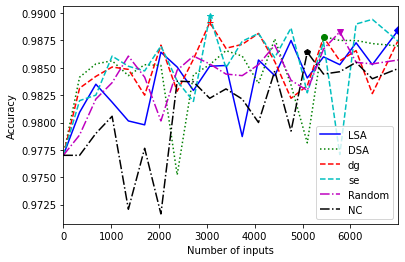

In [22]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, 6999])
#plt.ylim([0.95, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()